In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.python import keras
from keras.models import Sequential
from keras import applications
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
tf.__version__

'2.1.0'

In [19]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8229186106163985771]

In [20]:
#df = pd.read_csv('bank.csv', sep=',', na_values='.')
df = pd.read_csv('bank.csv')
#edu는   
#basic.4y 0
#high.school 1
#basic.6y 2
#professional.course 3
#basic.9y 4
#university.degree 5
# unknown 6
#illiterate 7


 


In [21]:
df.corr()

,age,education,housing,loan,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.075645,0.001855,-0.010697,0.006673,-0.050516,-0.037416,0.128179,-0.036070,-0.063312,0.049509
education,-0.075645,1.000000,0.017641,0.005725,-0.013618,-0.009755,-0.046171,0.056156,-0.002449,-0.003759,0.027649
housing,0.001855,0.017641,1.000000,0.048100,-0.005556,-0.059090,-0.077684,-0.036028,-0.058593,-0.044660,0.012092
loan,-0.010697,0.005725,0.048100,1.000000,0.006590,-0.000403,-0.003943,-0.019042,-0.002468,0.003246,-0.004687
duration,0.006673,-0.013618,-0.005556,0.006590,1.000000,-0.024539,0.011985,-0.008426,-0.030549,-0.042165,0.392781
emp.var.rate,-0.050516,-0.009755,-0.059090,-0.000403,-0.024539,1.000000,0.765002,0.142321,0.969109,0.899383,-0.309622
cons.price.idx,-0.037416,-0.046171,-0.077684,-0.003943,0.011985,0.765002,1.000000,0.015546,0.664338,0.484643,-0.130693
cons.conf.idx,0.128179,0.056156,-0.036028,-0.019042,-0.008426,0.142321,0.015546,1.000000,0.229120,0.061613,0.066306
euribor3m,-0.036070,-0.002449,-0.058593,-0.002468,-0.030549,0.969109,0.664338,0.229120,1.000000,0.944819,-0.320579
nr.employed,-0.063312,-0.003759,-0.044660,0.003246,-0.042165,0.899383,0.484643,0.061613,0.944819,1.000000,-0.368170


In [22]:
df

,age,education,housing,loan,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,261,1.1,93.994,-36.4,4.857,5191.0,0
1,37,1,1,0,226,1.1,93.994,-36.4,4.857,5191.0,0
2,40,2,0,0,151,1.1,93.994,-36.4,4.857,5191.0,0
3,56,1,0,1,307,1.1,93.994,-36.4,4.857,5191.0,0
4,59,3,0,0,139,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...
31823,73,3,1,0,334,-1.1,94.767,-50.8,1.028,4963.6,1
31824,46,3,0,0,383,-1.1,94.767,-50.8,1.028,4963.6,0
31825,56,5,1,0,189,-1.1,94.767,-50.8,1.028,4963.6,0
31826,44,3,0,0,442,-1.1,94.767,-50.8,1.028,4963.6,1


In [23]:
df.isnull().sum()

age               0
education         0
housing           0
loan              0
duration          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [24]:
fea=[]

In [25]:
for h in ['emp.var.rate' ,'cons.conf.idx','cons.price.idx','nr.employed']:
    fea.append(tf.feature_column.numeric_column(h))
#  'emp.var.rate'   'euribor3m'
age=tf.feature_column.numeric_column("age")
age_b=tf.feature_column.bucketized_column(age,boundaries=[10,20,30,40,50,60,70])
fea.append(age_b)

#df["education"]=df["education"].apply(str)
#education=tf.feature_column.categorical_column_with_vocabulary_list('education',['0','1','2','3','4','5','6','7'])
#education_o=tf.feature_column.indicator_column(education)
#fea.append(education_o)

df["housing"]=df["housing"].astype(str)
housing=tf.feature_column.categorical_column_with_vocabulary_list('housing',['0','1'])
housing_o=tf.feature_column.indicator_column(housing)
fea.append(housing_o)

df["loan"]=df["loan"].apply(str)
loan=tf.feature_column.categorical_column_with_vocabulary_list('loan',['0','1'])
loan_o=tf.feature_column.indicator_column(loan)
fea.append(loan_o)

duration=tf.feature_column.numeric_column("duration")
duration_b=tf.feature_column.bucketized_column(duration,boundaries=[50,100,150,200,250,300,400,500,800,1000])
fea.append(duration_b)

df["y"]=df["y"].apply(str)
y=tf.feature_column.categorical_column_with_vocabulary_list('y',['0','1'])
y_o=tf.feature_column.indicator_column(y)
fea.append(y_o)



In [26]:
fea

[NumericColumn(key='emp.var.rate', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='cons.conf.idx', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='cons.price.idx', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='nr.employed', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(10, 20, 30, 40, 50, 60, 70)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='housing', vocabulary_list=('0', '1'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='loan', vocabulary_list=('0', '1'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 BucketizedColumn(source_column=NumericColumn(key='duration', shape=(1,),

In [27]:
def create_dataset(dataframe,batch_size=32):
    dataframe=dataframe.copy()
    labels=dataframe.pop('euribor3m')
    

    return tf.data.Dataset.from_tensor_slices((dict(dataframe),labels)).shuffle(buffer_size=len(dataframe)).batch(batch_size)

In [28]:
train,test=train_test_split(df,test_size=0.2,random_state=42)
train_1=create_dataset(train)
test_1=create_dataset(test)

In [11]:
initializer = tf.keras.initializers.he_normal(seed=None)


In [12]:
model=tf.keras.models.Sequential([
    tf.keras.layers.DenseFeatures(feature_columns=fea,),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [13]:
model.compile(optimizer = 'adam',
           loss = 'mse',
             metrics=['mae'])
history=model.fit(train_1,validation_data=test_1,epochs=400)

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Train for 796 steps, validate for 199 steps
Epoch 1/400
796/796 [==============================] - 2s 2ms/step - loss: 3206.0478 - mae: 32.9766 - val_loss: 37.9831 - val_mae: 5.8924
Epoch 2/400
796/796 [==============================] - 1s 2ms/step - loss: 110.9997 - mae: 7.3204 - val_loss: 13.6634 - val_mae: 3.2928
Epoch 3/400
796/796 [==============================] - 1s 2ms/step - loss: 45.3228 - mae: 4.8377 - val_loss: 3.0093 - val_mae: 1.6183
Epoch 4/400
796/796 [==============================] - 1s 2ms/step - loss: 37.9443 - mae: 4.5927 - val_loss: 3.0341 - val_mae: 1.5784
Epoch 5/400
796/796 [==============================] - 1s 2ms/step - loss: 27.3747 - mae: 3.8664 - val_loss: 3.9966 - val_mae: 1.9162
Epoch 6/400
796/796 [===========

KeyboardInterrupt: 

In [ ]:
plt.plot(history.epoch,history.history['val_loss'])
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.ylim((0,2))
plt.show()

In [ ]:
plt.plot(history.epoch,history.history['val_loss'])
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.ylim((0,0.25))
plt.show()

In [29]:
hi=[]

In [30]:
initializer = tf.keras.initializers.he_normal(seed=None)

In [31]:
for i in range(10):
    model=tf.keras.models.Sequential([
    tf.keras.layers.DenseFeatures(feature_columns=fea,),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(1)
])
    model.compile(optimizer = 'adam',
           loss = 'mse',
             metrics=['mae'])
    history=model.fit(train_1,validation_data=test_1,epochs=10,use_multiprocessing=True)
    hi.append(history.history['val_loss'])



Train for 796 steps, validate for 199 steps
Epoch 1/10
796/796 [==============================] - 2s 2ms/step - loss: 246.2154 - mae: 4.0227 - val_loss: 1.3584 - val_mae: 0.8090
Epoch 2/10
796/796 [==============================] - 1s 2ms/step - loss: 0.7052 - mae: 0.6802 - val_loss: 0.3313 - val_mae: 0.4637
Epoch 3/10
796/796 [==============================] - 1s 2ms/step - loss: 9.5794 - mae: 2.1306 - val_loss: 12.0767 - val_mae: 3.4438
Epoch 4/10
796/796 [==============================] - 1s 2ms/step - loss: 32.9864 - mae: 3.1107 - val_loss: 0.2216 - val_mae: 0.3824
Epoch 5/10
796/796 [==============================] - 1s 2ms/step - loss: 9.8765 - mae: 2.0185 - val_loss: 0.3868 - val_mae: 0.5415
Epoch 6/10
796/796 [==============================] - 1s 2ms/step - loss: 14.0848 - mae: 2.9167 - val_loss: 10.0315 - val_mae: 3.1440
Epoch 7/10
796/796 [==============================] - 1s 2ms/step - loss: 14.2121 - mae: 3.0380 - val_loss: 23.9449 - val_mae: 4.8787
Epoch 8/10
796/796 [====

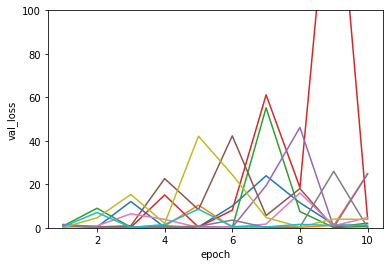

In [32]:
for i in range(len(hi)):
    plt.plot([1,2,3,4,5,6,7,8,9,10],hi[i])
    #plt.plot(history.history['val_accuracy'])
    plt.ylabel('val_loss')
    plt.xlabel('epoch')
    plt.ylim((0,100))
plt.show()

In [33]:
hi=[]

In [34]:
for i in range(10):
    model=tf.keras.models.Sequential([
    tf.keras.layers.DenseFeatures(feature_columns=fea,),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(1)
])
    model.compile(optimizer = 'adadelta',
           loss = 'mse',
             metrics=['mae'])
    history=model.fit(train_1,validation_data=test_1,epochs=10,use_multiprocessing=True)
    hi.append(history.history['val_loss'])



Train for 796 steps, validate for 199 steps
Epoch 1/10
796/796 [==============================] - 2s 2ms/step - loss: 421.5030 - mae: 11.7968 - val_loss: 2.6754 - val_mae: 1.5316
Epoch 2/10
796/796 [==============================] - 1s 1ms/step - loss: 2.7200 - mae: 1.5247 - val_loss: 2.6773 - val_mae: 1.4617
Epoch 3/10
796/796 [==============================] - 1s 2ms/step - loss: 2.6697 - mae: 1.5117 - val_loss: 2.6399 - val_mae: 1.5629
Epoch 4/10
796/796 [==============================] - 1s 1ms/step - loss: 2.6211 - mae: 1.4973 - val_loss: 2.5379 - val_mae: 1.4753
Epoch 5/10
796/796 [==============================] - 1s 2ms/step - loss: 2.5627 - mae: 1.4798 - val_loss: 2.5275 - val_mae: 1.4091
Epoch 6/10
796/796 [==============================] - 1s 1ms/step - loss: 2.5105 - mae: 1.4623 - val_loss: 2.4839 - val_mae: 1.5203
Epoch 7/10
796/796 [==============================] - 1s 2ms/step - loss: 2.4461 - mae: 1.4444 - val_loss: 2.3579 - val_mae: 1.4216
Epoch 8/10
796/796 [=========

Train for 796 steps, validate for 199 steps
Epoch 1/10
796/796 [==============================] - 2s 2ms/step - loss: 110769.4969 - mae: 323.1500 - val_loss: 34968.0657 - val_mae: 186.9926
Epoch 2/10
796/796 [==============================] - 1s 1ms/step - loss: 9511.4821 - mae: 81.2750 - val_loss: 32.4748 - val_mae: 5.3988
Epoch 3/10
796/796 [==============================] - 1s 2ms/step - loss: 4.4256 - mae: 1.8557 - val_loss: 3.4347 - val_mae: 1.7636
Epoch 4/10
796/796 [==============================] - 1s 2ms/step - loss: 3.4190 - mae: 1.7235 - val_loss: 3.4835 - val_mae: 1.6289
Epoch 5/10
796/796 [==============================] - 1s 2ms/step - loss: 3.3504 - mae: 1.7059 - val_loss: 3.3818 - val_mae: 1.7866
Epoch 6/10
796/796 [==============================] - 1s 2ms/step - loss: 3.2819 - mae: 1.6877 - val_loss: 3.2252 - val_mae: 1.6571
Epoch 7/10
796/796 [==============================] - 1s 1ms/step - loss: 3.1952 - mae: 1.6668 - val_loss: 3.2091 - val_mae: 1.5889
Epoch 8/10
796

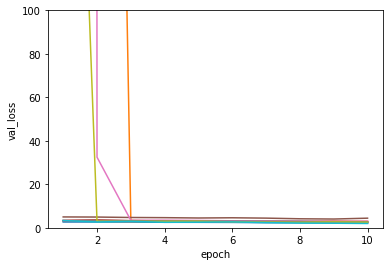

In [35]:
for i in range(len(hi)):
    plt.plot([1,2,3,4,5,6,7,8,9,10],hi[i])
    #plt.plot(history.history['val_accuracy'])
    plt.ylabel('val_loss')
    plt.xlabel('epoch')
    plt.ylim((0,100))
    #plt.legend(['train','test'],loc='upper left')
plt.show()

In [372]:
model=tf.keras.models.Sequential([
    tf.keras.layers.DenseFeatures(feature_columns=fea,),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [373]:
model.compile(optimizer = 'adadelta',
           loss = 'mse',
             metrics=['mae'])
history=model.fit(train_1,validation_data=test_1,epochs=200,use_multiprocessing=True)

Train for 796 steps, validate for 199 steps
Epoch 1/200
796/796 [==============================] - 2s 3ms/step - loss: 261.8491 - mae: 4.0148 - val_loss: 1.7226 - val_mae: 1.2572
Epoch 2/200
796/796 [==============================] - 2s 2ms/step - loss: 1.4773 - mae: 1.0220 - val_loss: 0.6079 - val_mae: 0.6099
Epoch 3/200
796/796 [==============================] - 2s 2ms/step - loss: 0.6244 - mae: 0.6098 - val_loss: 0.5848 - val_mae: 0.6728
Epoch 4/200
796/796 [==============================] - 2s 2ms/step - loss: 0.6784 - mae: 0.6426 - val_loss: 5.7176 - val_mae: 2.3580
Epoch 5/200
796/796 [==============================] - 2s 2ms/step - loss: 6.1739 - mae: 1.1730 - val_loss: 0.3343 - val_mae: 0.4968
Epoch 6/200
796/796 [==============================] - 2s 2ms/step - loss: 0.3806 - mae: 0.4871 - val_loss: 0.4208 - val_mae: 0.5724
Epoch 7/200
796/796 [==============================] - 2s 2ms/step - loss: 1.7223 - mae: 0.7876 - val_loss: 0.2082 - val_mae: 0.3685
Epoch 8/200
796/796 [==

Epoch 62/200
796/796 [==============================] - 2s 2ms/step - loss: 0.0234 - mae: 0.1076 - val_loss: 0.0301 - val_mae: 0.1465
Epoch 63/200
796/796 [==============================] - 2s 2ms/step - loss: 0.0442 - mae: 0.1250 - val_loss: 0.0168 - val_mae: 0.0818
Epoch 64/200
796/796 [==============================] - 2s 2ms/step - loss: 0.0271 - mae: 0.1118 - val_loss: 0.0195 - val_mae: 0.1040
Epoch 65/200
796/796 [==============================] - 2s 2ms/step - loss: 0.0247 - mae: 0.1115 - val_loss: 0.0163 - val_mae: 0.0908
Epoch 66/200
796/796 [==============================] - 2s 2ms/step - loss: 0.0348 - mae: 0.1195 - val_loss: 0.0195 - val_mae: 0.1023
Epoch 67/200
796/796 [==============================] - 2s 2ms/step - loss: 0.0828 - mae: 0.1500 - val_loss: 0.0142 - val_mae: 0.0765
Epoch 68/200
796/796 [==============================] - 2s 2ms/step - loss: 0.0153 - mae: 0.0851 - val_loss: 0.0124 - val_mae: 0.0800
Epoch 69/200
796/796 [==============================] - 2s 2ms

Epoch 123/200
796/796 [==============================] - 2s 2ms/step - loss: 0.0254 - mae: 0.0959 - val_loss: 0.0139 - val_mae: 0.0845
Epoch 124/200
796/796 [==============================] - 2s 2ms/step - loss: 0.0100 - mae: 0.0660 - val_loss: 0.0100 - val_mae: 0.0531
Epoch 125/200
796/796 [==============================] - 2s 2ms/step - loss: 0.0113 - mae: 0.0693 - val_loss: 0.0071 - val_mae: 0.0489
Epoch 126/200
796/796 [==============================] - 2s 2ms/step - loss: 0.0117 - mae: 0.0700 - val_loss: 0.0206 - val_mae: 0.1189
Epoch 127/200
796/796 [==============================] - 2s 2ms/step - loss: 0.0373 - mae: 0.1053 - val_loss: 0.0078 - val_mae: 0.0607
Epoch 128/200
796/796 [==============================] - 2s 2ms/step - loss: 0.0097 - mae: 0.0647 - val_loss: 0.0071 - val_mae: 0.0518
Epoch 129/200
796/796 [==============================] - 2s 2ms/step - loss: 0.0141 - mae: 0.0697 - val_loss: 0.0107 - val_mae: 0.0584
Epoch 130/200
796/796 [==============================] 

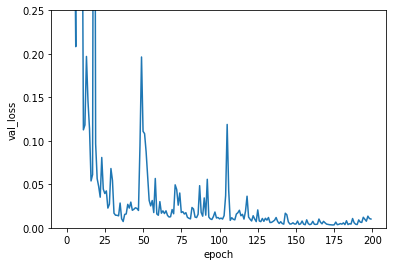

In [374]:
plt.plot(history.epoch,history.history['val_loss'])
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.ylim((0,0.25))
plt.show()

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8939470791941419728
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5704595808151644114
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15687032812673797427
physical_device_desc: "device: XLA_GPU device"
]


In [22]:
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# log_device_placement을 True로 설정하여 세션을 만듭니다.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# op를 실행합니다.
print (sess.run(c))

AttributeError: module 'tensorflow' has no attribute 'Session'

In [14]:
tf.__version__

'2.1.0'